<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/TFRecords_Clase_18_5_dic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from PIL import Image
import numpy as np

# Función para convertir una imagen en un ejemplo de TFRecord
def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    return tf.train.Feature(
        bytes_list=tf.train.BytesList(value=[tf.io.encode_jpeg(value).numpy()])
    )

# Función para convertir un array de numpy en un ejemplo de TFRecord
def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=value))

# Función para escribir un archivo TFRecord
def serialize_example(image, label):
    feature = {
        'image': _bytes_feature(image),
        'label': _int64_feature(label),
    }
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()

# Ejemplo de datos (supongamos que ya tienes un conjunto de datos)
images = [np.array(Image.open('/content/drive/MyDrive/druida/Cat/1.jpg')),
          np.array(Image.open("/content/drive/MyDrive/druida/Cat/1000.jpg"))]
labels = [0, 1]

# Nombre del archivo TFRecord
tfrecord_filename = 'ejemplo.tfrecord'

# Crear un archivo TFRecord
with tf.io.TFRecordWriter(tfrecord_filename) as writer:
    for image, label in zip(images, labels):
        example = serialize_example(image, [label])
        writer.write(example)

# Leer un archivo TFRecord
raw_dataset = tf.data.TFRecordDataset([tfrecord_filename])

# Definir la estructura de los datos
feature_description = {
    'image': tf.io.FixedLenFeature([], tf.string),
    'label': tf.io.FixedLenFeature([1], tf.int64),
}

# Función para parsear un ejemplo
def _parse_function(proto):
    # Parsear el ejemplo
    parsed_features = tf.io.parse_single_example(proto, feature_description)
    # Decodificar la imagen
    parsed_features['image'] = tf.io.decode_jpeg(parsed_features['image'])
    return parsed_features

# Aplicar la función de parseo al conjunto de datos
parsed_dataset = raw_dataset.map(_parse_function)

# Imprimir los resultados
for parsed_record in parsed_dataset:
    print(parsed_record)


In [ ]:

from google.colab import drive
drive.mount('/content/drive')


# Importar las bibliotecas necesarias
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np

# Cargar el modelo Inception v3 preentrenado
model = InceptionV3(weights='imagenet')

# Cargar una imagen de ejemplo para la clasificación
img_path = '/content/drive/MyDrive/druida/Cat/1.jpg'  # Reemplaza con la ruta de tu imagen
img = image.load_img(img_path, target_size=(299, 299))  # Inception v3 espera imágenes de tamaño 299x299
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Realizar la predicción
predictions = model.predict(x)

# Decodificar y mostrar las predicciones
decoded_predictions = decode_predictions(predictions, top=3)[0]
print("Predicciones:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")


1/1 [==============================] - 2s 2s/step


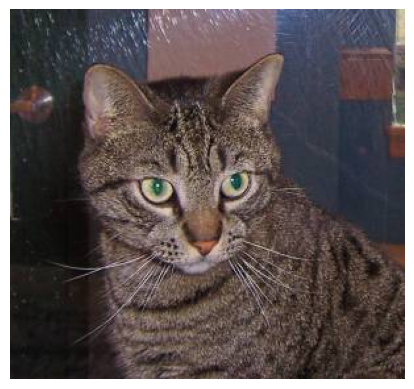

Predicciones:
1: tabby (0.75)
2: Egyptian_cat (0.09)
3: tiger_cat (0.05)


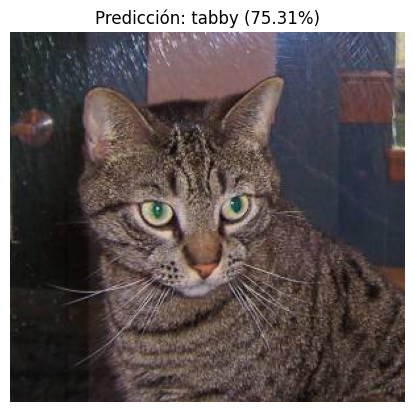

In [5]:

from google.colab import drive
drive.mount('/content/drive')


from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargar el modelo Inception v3 preentrenado
model = InceptionV3(weights='imagenet')

# Cargar una imagen de ejemplo para la clasificación
img_path = '/content/drive/MyDrive/druida/Cat/1.jpg'  # Reemplaza con la ruta de tu imagen
img = image.load_img(img_path, target_size=(299, 299))  # Inception v3 espera imágenes de tamaño 299x299
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Realizar la predicción
predictions = model.predict(x)

# Decodificar y mostrar las predicciones
decoded_predictions = decode_predictions(predictions, top=3)[0]

# Mostrar la imagen
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

# Mostrar las predicciones
print("Predicciones:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

# Mostrar la imagen con la etiqueta y el porcentaje de confianza de la predicción principal
top_prediction = decoded_predictions[0]
label = top_prediction[1]
confidence = top_prediction[2]
plt.imshow(img)
plt.title(f'Predicción: {label} ({confidence:.2%})')
plt.axis('off')
plt.show()
